# Basic workflows

In [1]:
%load_ext autoreload
%autoreload 2

import cfr

## Create a reconstruction job object

In [2]:
job = cfr.ReconJob(verbose=True)
print(job)

>>> job.configs:
{}


## Load a proxy database

In [10]:
job.load_proxydb('./data/pages2k_dataset.pkl', verbose=True)

>>> job.configs["proxydb_path"] = ./data/pages2k_dataset.pkl
>>> 692 records loaded
>>> job.proxydb created


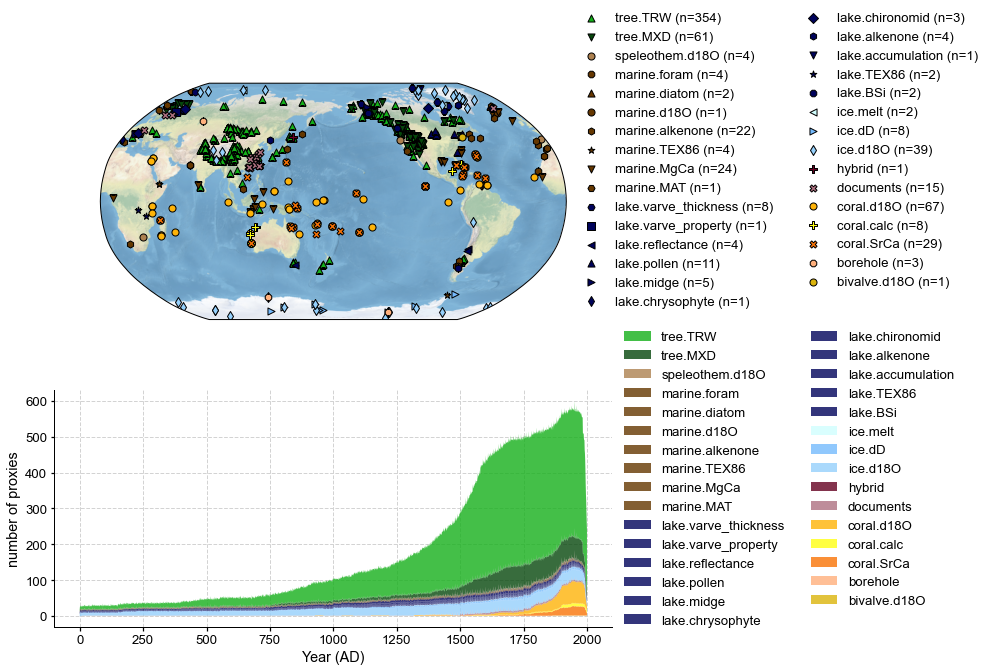

In [11]:
fig, ax = job.proxydb.plot(plot_count=True)

## Filter a proxy database

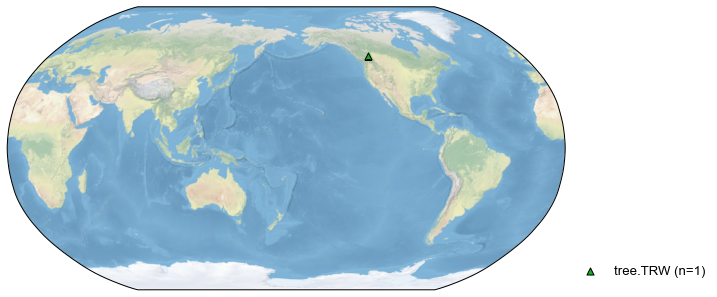

In [12]:
# filtering a ProxyDatabase object returns a new ProxyDatabase object
pdb_tree = job.proxydb.filter(by='pid', keys=['NAm_153'])
fig, ax = pdb_tree.plot()

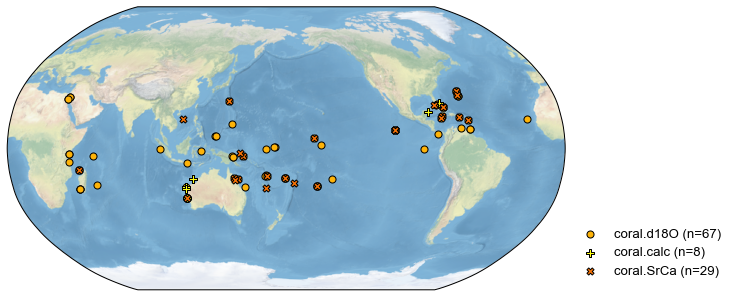

In [13]:
# job.filter_proxydb() will, however, modify job.proxydb by default,
# unless we set inplace=False for a test
pdb_filtered = job.filter_proxydb(by='ptype', keys=['coral'], verbose=True, inplace=False)
fig, ax = pdb_filtered.plot()

>>> 1 records remaining
>>> job.proxydb updated


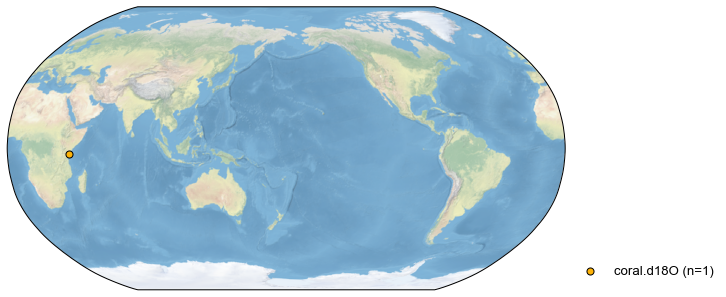

In [18]:
# for this test, we take only one coral record, since inplace=True by default, job.proxydb will be modified
job.filter_proxydb(by='pid', keys=['Ocn_076'], verbose=True)
fig, ax = job.proxydb.plot()

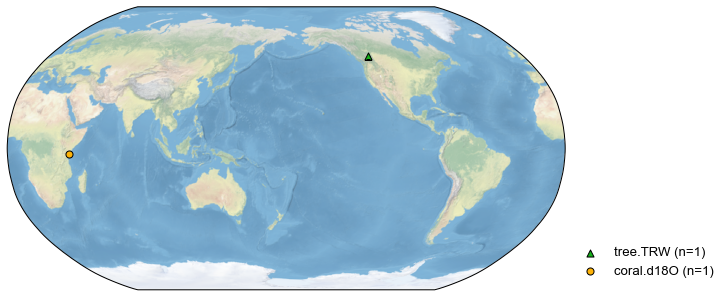

In [19]:
# we may add a ProxyDatabase into job.proxydb
job.proxydb += pdb_tree
fig, ax = job.proxydb.plot()

## Annualize/seasonalize the proxy database

Annualizing ProxyRecord: 100%|██████████| 1/1 [00:00<00:00, 14.09it/s]


>>> 2 records remaining
>>> job.proxydb updated


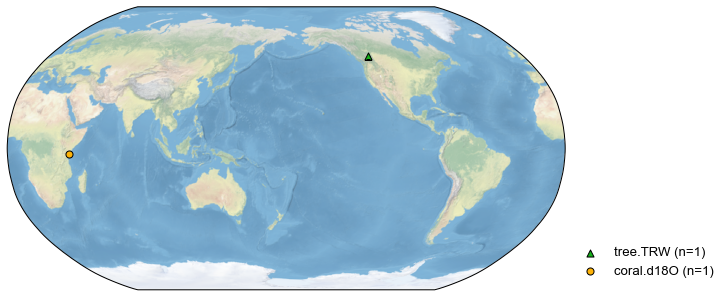

In [20]:
# we only annualize coral records
job.annualize_proxydb(months=[6, 7, 8], ptypes=['coral'], verbose=True)
fig, ax = job.proxydb.plot()

In [21]:
# let's check the time axis of the coral record
job.proxydb.records['Ocn_076'].time

array([1887., 1888., 1889., 1890., 1891., 1892., 1893., 1894., 1895.,
       1896., 1897., 1898., 1899., 1900., 1901., 1902., 1903., 1904.,
       1905., 1906., 1907., 1908., 1909., 1910., 1911., 1912., 1913.,
       1914., 1915., 1916., 1917., 1918., 1919., 1920., 1921., 1922.,
       1923., 1924., 1925., 1926., 1927., 1928., 1929., 1930., 1931.,
       1932., 1933., 1934., 1935., 1936., 1937., 1938., 1939., 1940.,
       1941., 1942., 1943., 1944., 1945., 1946., 1947., 1948., 1949.,
       1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958.,
       1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
       1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
       1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
       1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002.])

## Load climate modoel priors

In [22]:
job.load_gridded(
    tag='prior',
    path_dict={
        'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
        'pr': './data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
    },
    center_period=(1951, 1980),
    verbose=True,
)

>>> job.configs["prior_path"] = {'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc', 'pr': './data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'}
>>> instrumental observation variables ['tas', 'pr'] loaded
>>> job.prior created


## Load instrumental observations

In [23]:
job.load_gridded(
    tag='obs',
    path_dict={
        'tas': './data/gistemp1200_ERSSTv4.nc',
        'pr': './data/GPCC_precip.mon.flux.1x1.v6.nc',
    },
    rename_dict={'tas': 'tempanomaly', 'pr': 'precip'},
    center_period=(1951, 1980),
    verbose=True,
)

>>> job.configs["obs_path"] = {'tas': './data/gistemp1200_ERSSTv4.nc', 'pr': './data/GPCC_precip.mon.flux.1x1.v6.nc'}
>>> instrumental observation variables ['tas', 'pr'] loaded
>>> job.obs created


In [13]:
# note that the lon axis has been wrapped into the 0-360 range
job.obs['tas'].da

<xarray.DataArray 'tas' (time: 1648, lat: 90, lon: 180)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 1.56      ,  1.56      ,  1.56      , ...,  1.56      ,
          1.56      ,  1.56      ],
        [ 1.56      ,  1.56      ,  1.56      , ...,  1.56      ,
          1.56      ,  1.56      ],
        [ 1.56      ,  1.56      ,  1.56      , ...,  1.56      ,
          1.56      ,  1.56      ]],

       [[-1.0299653 , -1.0299653 , -1.0299653 , ..., -1.0299653 ,
         -1.0299653 , -1.0299653 ],
        [-1.0299653 , -1.0299653 , -1.0299653 , ..., -1.0299653 ,
         -1.0299653 , -1.0299653 ],
        [-1.0299653 , -1.0299653 , -1.0299653 , ..., -1.0299653 ,
         -1.0299653 , -1.0299653 ],
        ...,
        [-0.29999998, -0.29999998, -0.29999998, ..., -0.29999998,
         -0.29999998, -0.29999998],
        [-0.29999998, -0.29999998, -0.29999998, ..., -0.29999998,
         -0.29999998, -0.29999998],
        [-0.29999998, -0.29999998, -0.29999998, ..., -0.29999998,
         -0.29999998, -0.29999998]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2017-04-15

In [24]:
# now let's check out configurations
job.configs

{'proxydb_path': './data/pages2k_dataset.pkl',
 'prior_path': {'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
  'pr': './data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'},
 'obs_path': {'tas': './data/gistemp1200_ERSSTv4.nc',
  'pr': './data/GPCC_precip.mon.flux.1x1.v6.nc'}}

## Calibrate the PSMs

In [44]:
ptype_psm_dict = {
    'coral.d18O': 'Linear',
    'tree.TRW': 'Bilinear',
}
ptype_season_dict = {
    'coral.d18O': [6, 7, 8],
    'tree.TRW': [
        [1,2,3,4,5,6,7,8,9,10,11,12],
        [6,7,8],
        [3,4,5,6,7,8],
        [6,7,8,9,10,11],
        [-12,1,2],
        [-9,-10,-11,-12,1,2],
        [-12,1,2,3,4,5],
    ],
}
job.calib_psms(ptype_psm_dict=ptype_psm_dict, ptype_season_dict=ptype_season_dict, verbose=True)

>>> job.configs["ptype_psm_dict"] = {'coral.d18O': 'Linear', 'tree.TRW': 'Bilinear'}
>>> job.configs["ptype_season_dict"] = {'coral.d18O': [6, 7, 8], 'tree.TRW': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [6, 7, 8], [3, 4, 5, 6, 7, 8], [6, 7, 8, 9, 10, 11], [-12, 1, 2], [-9, -10, -11, -12, 1, 2], [-12, 1, 2, 3, 4, 5]]}


Calibrating the PSMs:: 100%|██████████| 2/2 [00:03<00:00,  1.50s/it]

>>> job.psm created for 2 records
>>> job.proxydb updated with the tag: "calibrated"


In [45]:
# the proxies with calibrated PSM will be tagged
for pid, pobj in job.proxydb.records.items():
    print(pid, pobj.tags)

Ocn_076 ['calibrated']
NAm_153 ['calibrated']


In [52]:
# check the fitting R-squared
job.psms['NAm_153'].calib_details['fitR2adj']

0.13500868898269947

## Forward the PSMs

In [47]:
job.forward_psms(verbose=True)

Forwarding the PSMs:: 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

>>> job.ppdb created for 2 records


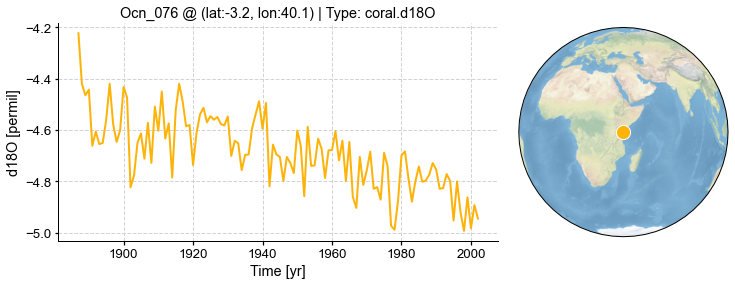

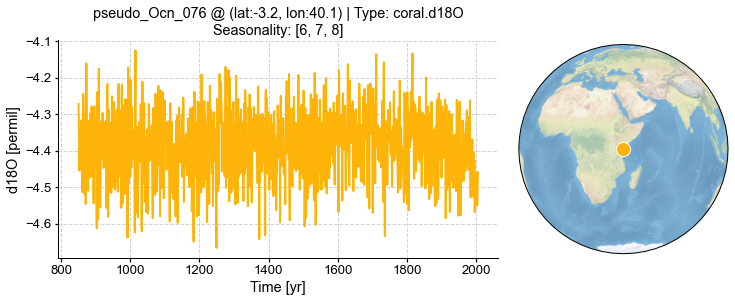

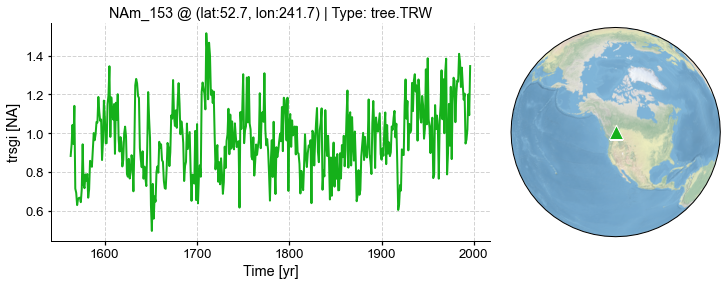

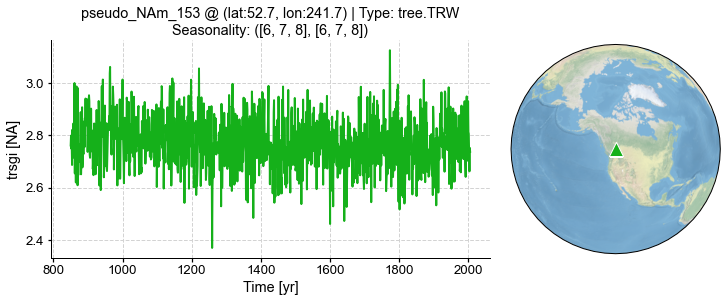

In [48]:
for pid, pobj in job.proxydb.records.items():
    fig, ax = pobj.plot()
    fig, ax = job.ppdb.records[f'pseudo_{pid}'].plot()

In [55]:
# let's add the pids into the configurations
job.mark_pids(verbose=True)
job.configs

>>> job.configs updated with pids: ['Ocn_076', 'NAm_153']


{'proxydb_path': './data/pages2k_dataset.pkl',
 'prior_path': {'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
  'pr': './data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'},
 'obs_path': {'tas': './data/gistemp1200_ERSSTv4.nc',
  'pr': './data/GPCC_precip.mon.flux.1x1.v6.nc'},
 'ptype_psm_dict': {'coral.d18O': 'Linear', 'tree.TRW': 'Bilinear'},
 'ptype_season_dict': {'coral.d18O': [6, 7, 8],
  'tree.TRW': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
   [6, 7, 8],
   [3, 4, 5, 6, 7, 8],
   [6, 7, 8, 9, 10, 11],
   [-12, 1, 2],
   [-9, -10, -11, -12, 1, 2],
   [-12, 1, 2, 3, 4, 5]]},
 'psm_calib_period': (1850, 2015),
 'pids': ['Ocn_076', 'NAm_153']}

## Annualize/seasonalize the climate model prior

In [65]:
job.annualize_ds(tag='prior', verbose=True, months=[6, 7, 8])

>>> job.configs["prior_annualize_months"] = [6, 7, 8]
>>> Processing tas ...
>>> Processing pr ...
>>> job.prior updated


(<Figure size 720x576 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'tas, 2005-8'}>)

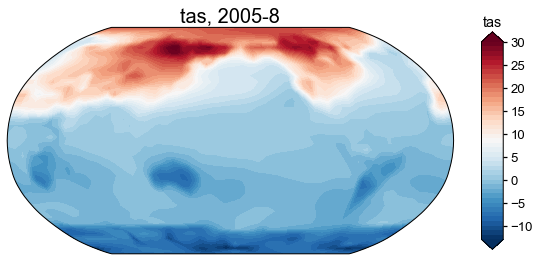

In [66]:
job.prior['tas'].plot(it=-1)

In [67]:
job.prior['tas'].da

<xarray.DataArray 'tas' (time: 1156, lat: 42, lon: 63)>
array([[[ -7.47643518,  -7.51106125,  -7.60682241, ...,  -7.61908068,
          -7.52936638,  -7.47643518],
        [ -9.42977243,  -9.21364785,  -8.86146122, ...,  -9.45751958,
          -9.48816517,  -9.42977243],
        [-11.21933535, -11.02493929, -10.24814865, ..., -11.40715016,
         -11.32899803, -11.21933535],
        ...,
        [ 14.3567651 ,  13.71429314,  13.64500353, ...,  15.90731181,
          15.31555513,  14.3567651 ],
        [ 17.63995069,  17.4853255 ,  17.30944453, ...,  18.25940938,
          17.91855767,  17.63995069],
        [ 18.94141579,  18.93667196,  18.92585822, ...,  18.96997372,
          18.95361359,  18.94141579]],

       [[ -8.11308289,  -8.14893049,  -8.24326463, ...,  -8.25515156,
          -8.16677331,  -8.11308289],
        [ -9.96100292,  -9.97281143,  -9.79959508, ...,  -9.5524724 ,
          -9.80851089,  -9.96100292],
        [ -9.46036908,  -9.92644796, -10.13992205, ...,  -8.78133766,
          -8.99808642,  -9.46036908],
...
        [ 14.53631427,  13.66631166,  13.66456364, ...,  16.23888786,
          15.70978998,  14.53631427],
        [ 17.16435759,  17.05403509,  17.00732885, ...,  17.63017439,
          17.36501944,  17.16435759],
        [ 18.12553978,  18.13750532,  18.13620346, ...,  18.13540176,
          18.12712891,  18.12553978]],

       [[ -8.02508545,  -8.05244784,  -8.15332905, ...,  -8.16716757,
          -8.07882773,  -8.02508545],
        [ -9.49518864,  -9.16392655,  -8.74296983, ...,  -9.76262733,
          -9.68813762,  -9.49518864],
        [-11.93293941, -11.32976721, -10.41667034, ..., -12.37823061,
         -12.1428479 , -11.93293941],
        ...,
        [ 15.14224109,  14.13358768,  14.08309544, ...,  17.36154388,
          16.55513144,  15.14224109],
        [ 19.38425552,  19.14868929,  18.96859062, ...,  20.08208032,
          19.72616568,  19.38425552],
        [ 21.30426979,  21.3106148 ,  21.30226732, ...,  21.32455081,
          21.31077791,  21.30426979]]])
Coordinates:
  * time     (time) object 0850-08-31 00:00:00 ... 2005-08-31 00:00:00
  * lon      (lon) float64 0.0 5.806 11.61 17.42 ... 342.6 348.4 354.2 360.0
  * lat      (lat) float64 -90.0 -85.61 -81.22 -76.83 ... 76.83 81.22 85.61 90.0

In [68]:
job.regrid_ds(tag='prior', nlat=42, nlon=63, verbose=True)
job.prior['tas'].da

>>> job.configs["prior_regrid_nlat"] = 42
>>> job.configs["prior_regrid_nlon"] = 63
>>> job.configs["prior_regrid_lats"] = [-90.         -85.6097561  -81.2195122  -76.82926829 -72.43902439
 -68.04878049 -63.65853659 -59.26829268 -54.87804878 -50.48780488
 -46.09756098 -41.70731707 -37.31707317 -32.92682927 -28.53658537
 -24.14634146 -19.75609756 -15.36585366 -10.97560976  -6.58536585
  -2.19512195   2.19512195   6.58536585  10.97560976  15.36585366
  19.75609756  24.14634146  28.53658537  32.92682927  37.31707317
  41.70731707  46.09756098  50.48780488  54.87804878  59.26829268
  63.65853659  68.04878049  72.43902439  76.82926829  81.2195122
  85.6097561   90.        ]
>>> job.configs["prior_regrid_lons"] = [  0.           5.80645161  11.61290323  17.41935484  23.22580645
  29.03225806  34.83870968  40.64516129  46.4516129   52.25806452
  58.06451613  63.87096774  69.67741935  75.48387097  81.29032258
  87.09677419  92.90322581  98.70967742 104.51612903 110.32258065
 116.12903226 121.9

<xarray.DataArray 'tas' (time: 1156, lat: 42, lon: 63)>
array([[[ -7.47643518,  -7.51106125,  -7.60682241, ...,  -7.61908068,
          -7.52936638,  -7.47643518],
        [ -9.42977243,  -9.21364785,  -8.86146122, ...,  -9.45751958,
          -9.48816517,  -9.42977243],
        [-11.21933535, -11.02493929, -10.24814865, ..., -11.40715016,
         -11.32899803, -11.21933535],
        ...,
        [ 14.3567651 ,  13.71429314,  13.64500353, ...,  15.90731181,
          15.31555513,  14.3567651 ],
        [ 17.63995069,  17.4853255 ,  17.30944453, ...,  18.25940938,
          17.91855767,  17.63995069],
        [ 18.94141579,  18.93667196,  18.92585822, ...,  18.96997372,
          18.95361359,  18.94141579]],

       [[ -8.11308289,  -8.14893049,  -8.24326463, ...,  -8.25515156,
          -8.16677331,  -8.11308289],
        [ -9.96100292,  -9.97281143,  -9.79959508, ...,  -9.5524724 ,
          -9.80851089,  -9.96100292],
        [ -9.46036908,  -9.92644796, -10.13992205, ...,  -8.78133766,
          -8.99808642,  -9.46036908],
...
        [ 14.53631427,  13.66631166,  13.66456364, ...,  16.23888786,
          15.70978998,  14.53631427],
        [ 17.16435759,  17.05403509,  17.00732885, ...,  17.63017439,
          17.36501944,  17.16435759],
        [ 18.12553978,  18.13750532,  18.13620346, ...,  18.13540176,
          18.12712891,  18.12553978]],

       [[ -8.02508545,  -8.05244784,  -8.15332905, ...,  -8.16716757,
          -8.07882773,  -8.02508545],
        [ -9.49518864,  -9.16392655,  -8.74296983, ...,  -9.76262733,
          -9.68813762,  -9.49518864],
        [-11.93293941, -11.32976721, -10.41667034, ..., -12.37823061,
         -12.1428479 , -11.93293941],
        ...,
        [ 15.14224109,  14.13358768,  14.08309544, ...,  17.36154388,
          16.55513144,  15.14224109],
        [ 19.38425552,  19.14868929,  18.96859062, ...,  20.08208032,
          19.72616568,  19.38425552],
        [ 21.30426979,  21.3106148 ,  21.30226732, ...,  21.32455081,
          21.31077791,  21.30426979]]])
Coordinates:
  * time     (time) object 0850-08-31 00:00:00 ... 2005-08-31 00:00:00
  * lon      (lon) float64 0.0 5.806 11.61 17.42 ... 342.6 348.4 354.2 360.0
  * lat      (lat) float64 -90.0 -85.61 -81.22 -76.83 ... 76.83 81.22 85.61 90.0

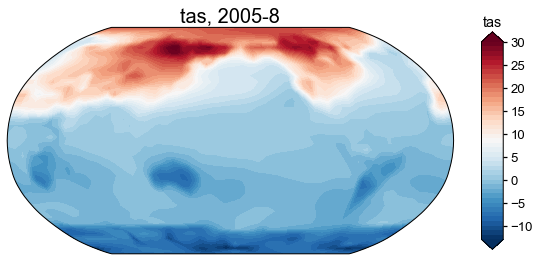

In [69]:
fig, ax = job.prior['tas'].plot(-1)

## Saving the `job` object

In [61]:
job.save(job_dirpath='./data/exp_test', verbose=True)

>>> job.configs["job_dirpath"] = ./data/exp_test
>>> job saved to: ./data/exp_test


In [62]:
import pandas as pd
job = pd.read_pickle('./data/exp_test/job.pkl')
job.configs

{'proxydb_path': './data/pages2k_dataset.pkl',
 'prior_path': {'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
  'pr': './data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'},
 'obs_path': {'tas': './data/gistemp1200_ERSSTv4.nc',
  'pr': './data/GPCC_precip.mon.flux.1x1.v6.nc'},
 'ptype_psm_dict': {'coral.d18O': 'Linear', 'tree.TRW': 'Bilinear'},
 'ptype_season_dict': {'coral.d18O': [6, 7, 8],
  'tree.TRW': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
   [6, 7, 8],
   [3, 4, 5, 6, 7, 8],
   [6, 7, 8, 9, 10, 11],
   [-12, 1, 2],
   [-9, -10, -11, -12, 1, 2],
   [-12, 1, 2, 3, 4, 5]]},
 'psm_calib_period': (1850, 2015),
 'pids': ['Ocn_076', 'NAm_153'],
 'job_dirpath': './data/exp_test'}

In [63]:
job.prior['tas'].da

<xarray.DataArray 'tas' (time: 1156, lat: 42, lon: 63)>
array([[[ -7.47643518,  -7.51106125,  -7.60682241, ...,  -7.61908068,
          -7.52936638,  -7.47643518],
        [ -9.42977243,  -9.21364785,  -8.86146122, ...,  -9.45751958,
          -9.48816517,  -9.42977243],
        [-11.21933535, -11.02493929, -10.24814865, ..., -11.40715016,
         -11.32899803, -11.21933535],
        ...,
        [ 14.3567651 ,  13.71429314,  13.64500353, ...,  15.90731181,
          15.31555513,  14.3567651 ],
        [ 17.63995069,  17.4853255 ,  17.30944453, ...,  18.25940938,
          17.91855767,  17.63995069],
        [ 18.94141579,  18.93667196,  18.92585822, ...,  18.96997372,
          18.95361359,  18.94141579]],

       [[ -8.11308289,  -8.14893049,  -8.24326463, ...,  -8.25515156,
          -8.16677331,  -8.11308289],
        [ -9.96100292,  -9.97281143,  -9.79959508, ...,  -9.5524724 ,
          -9.80851089,  -9.96100292],
        [ -9.46036908,  -9.92644796, -10.13992205, ...,  -8.78133766,
          -8.99808642,  -9.46036908],
...
        [ 14.53631427,  13.66631166,  13.66456364, ...,  16.23888786,
          15.70978998,  14.53631427],
        [ 17.16435759,  17.05403509,  17.00732885, ...,  17.63017439,
          17.36501944,  17.16435759],
        [ 18.12553978,  18.13750532,  18.13620346, ...,  18.13540176,
          18.12712891,  18.12553978]],

       [[ -8.02508545,  -8.05244784,  -8.15332905, ...,  -8.16716757,
          -8.07882773,  -8.02508545],
        [ -9.49518864,  -9.16392655,  -8.74296983, ...,  -9.76262733,
          -9.68813762,  -9.49518864],
        [-11.93293941, -11.32976721, -10.41667034, ..., -12.37823061,
         -12.1428479 , -11.93293941],
        ...,
        [ 15.14224109,  14.13358768,  14.08309544, ...,  17.36154388,
          16.55513144,  15.14224109],
        [ 19.38425552,  19.14868929,  18.96859062, ...,  20.08208032,
          19.72616568,  19.38425552],
        [ 21.30426979,  21.3106148 ,  21.30226732, ...,  21.32455081,
          21.31077791,  21.30426979]]])
Coordinates:
  * time     (time) object 0850-08-31 00:00:00 ... 2005-08-31 00:00:00
  * lon      (lon) float64 0.0 5.806 11.61 17.42 ... 342.6 348.4 354.2 360.0
  * lat      (lat) float64 -90.0 -85.61 -81.22 -76.83 ... 76.83 81.22 85.61 90.0

## Data assimilation

### Randomly pick proxy records

In [64]:
job.split_proxydb(verbose=True)
job.configs

>>> job.configs["proxy_assim_frac"] = 0.75


{'proxydb_path': './data/pages2k_dataset.pkl',
 'prior_path': {'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
  'pr': './data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'},
 'obs_path': {'tas': './data/gistemp1200_ERSSTv4.nc',
  'pr': './data/GPCC_precip.mon.flux.1x1.v6.nc'},
 'ptype_psm_dict': {'coral.d18O': 'Linear', 'tree.TRW': 'Bilinear'},
 'ptype_season_dict': {'coral.d18O': [6, 7, 8],
  'tree.TRW': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
   [6, 7, 8],
   [3, 4, 5, 6, 7, 8],
   [6, 7, 8, 9, 10, 11],
   [-12, 1, 2],
   [-9, -10, -11, -12, 1, 2],
   [-12, 1, 2, 3, 4, 5]]},
 'psm_calib_period': (1850, 2015),
 'pids': ['Ocn_076', 'NAm_153'],
 'job_dirpath': './data/exp_test',
 'proxy_assim_frac': 0.75}